# Data Wrangling Project : WeRateDogs

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Gathering Data

### 1.1 The WeRateDogs Twitter archive geathering 

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 The tweet image predictions geathering

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (url.split('/')[-1],'wb') as file:
    file.write(response.content)

df_2 = pd.read_csv(url.split('/')[-1], delimiter='\t')

In [5]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3  Each tweet's retweet count and favorite count geathering

In [6]:
%%script false

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tw_ar.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
tweets_json = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        tweets_json.append(tweet)
tweets_json[0]        

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [8]:
df_list = []
for tweet in tweets_json:
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    favorite_count = tweet['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count})

df_3 = pd.DataFrame(df_list ,columns=['tweet_id', 'retweet_count', 'favorite_count'])
df_3.head() 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 2  Assessing Data

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_1[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
list(df_1[df_1['rating_denominator'] > 10]['expanded_urls'].sample(1))

['https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1']

In [12]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Leo            6
Jack           6
Oscar          6
Rusty          6
Stanley        6
Koda           6
Jax            6
Dave           6
Scout          6
Milo           6
Bella          6
Gus            5
            ... 
Dook           1
Chaz           1
Banditt        1
Bobbay         1
Diogi          1
Kloey          1
O              1
Derby          1
Grady          1
Rontu          1
Olaf           1
Mitch          1
DonDon         1
Reagan         1
Remus          1
Kenzie         1
Gustaf         1
Herb           1
Vinnie         1
Shnuggles      1
Pluto          1
Nico           1
Spanky         1
Arnold         1
Snoop          1
Meatball       1
Vinscent       1
Emanuel       

In [13]:
list(df_1[df_1['name'] == 'a']['expanded_urls'].sample(1))

['https://twitter.com/dog_rates/status/669661792646373376/photo/1']

In [14]:
df_1[df_1['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
list(df_1.text.sample())

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"]

In [16]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality Issues
##### df_1
- `tweet_id`, `retweeted_status_id` ,`retweeted_status_user_id` data types are **integer** instead of **string**.
- `timestamp`, `retweeted_status_timestamp` contains **"+0000"** at the end.
- `timestamp`, `retweeted_status_timestamp` data types are **object** instead of **datetime**.
- `rating_numerator`, `rating_denominator` contain ratings more than 10 for photos that include more than one dog.
- `names` contains **("None", "a", "an", "the")** instead of **NaN**.
- `doggo`, `floofer`, `pupper`, `puppo` contains **("None")** instead of **NaN**.
- `text` contains **url** at the end.
#### df_2
- `tweet_id` data type is **integer** instead of **string**.
#### df_3
- `tweet_id` data type is **integer** instead of **string**.

### Tidiness Issues 
#### df_1
- combine `doggo`, `floofer`, `pupper`, `puppo` into `doggolingo`.
- calculate `rating` from `rating_numerator` and `rating_denominator`
- extract short url from `text` into `url`
- needed columns are only `tweet_id`, `url`, `timestamp`, `text`, `rating`, `name`, `doggolingo`.

#### df_2
- extract doog breed into `breed` and also is it a dog or not into `is_dog`.
- replce "_" with " " in `breed`.
- needed columns are only `tweet_id`,`img_num`, `breed`, `is_dog` .

#### general 
- Some tweets contain things that are not dogs.
- combine `df_1`, `df_2`, `df_3` into one dataset.


## 3 Cleaning Data

In [21]:
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

### define 
- convert tweet_id column in `df1_clean` from integer to string

### code

In [22]:
df1_clean.tweet_id = df1_clean.tweet_id.values.astype(str)

### test

In [23]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### define
- remove "+0000" from timestamp column 
- convert timestamp column from object to datetime

### code

In [24]:
df1_clean.timestamp = df1_clean.timestamp.str[:-5]
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

### test

In [25]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [26]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### define
- calculate rating = (rating_numerator / rating_denominator)*10 that makes all denominator = 10
- Remove tweets with illogical rating ( more than 20/10 )
- round rating to integer

### code

In [27]:
df1_clean['rating'] = (df1_clean.rating_numerator / df1_clean.rating_denominator) * 10
df1_clean = df1_clean[~(df1_clean['rating'] >= 20)]
df1_clean['rating'] = df1_clean['rating'].round(0).astype(int)

### test

In [28]:
df1_clean['rating'].value_counts()

12    563
11    469
10    463
13    351
9     157
8     104
7      55
14     54
5      38
6      33
3      19
4      15
2      11
1       8
0       2
15      2
17      1
Name: rating, dtype: int64

In [29]:
df1_clean[df1_clean['rating'] >= 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


### define
- replace ("None", "a", "an", "the") with NaN in name column

### code

In [30]:
nan_list = ['None', 'a', 'an', 'the']
df1_clean.name = df1_clean.name.replace(nan_list, np.nan)

### test

In [31]:
df1_clean.name.value_counts()

Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Jack          6
Milo          6
Koda          6
Jax           6
Rusty         6
Bella         6
Leo           6
Oscar         6
Scout         6
Stanley       6
Dave          6
Alfie         5
very          5
Bentley       5
Sammy         5
Louis         5
             ..
Sky           1
Gert          1
Dook          1
Chaz          1
Banditt       1
Derby         1
Shnuggles     1
Creg          1
Gustaf        1
Mauve         1
Darla         1
Rontu         1
Olaf          1
Mitch         1
DonDon        1
Reagan        1
Remus         1
Kenzie        1
Herb          1
Emanuel       1
Grady         1
Vinnie        1
Pluto         1
Nico          1
Spanky        1
Arnold        1
Snoop         1
Meatball      1
Vinscent      1
Franq         1
Name: name, Length: 952,

### define
replace ("None") with NaN in doggo, floofer, pupper, puppo columns

### code

In [32]:
df1_clean.doggo = df1_clean.doggo.replace('None', np.nan)
df1_clean.floofer = df1_clean.floofer.replace('None', np.nan)
df1_clean.pupper = df1_clean.pupper.replace('None', np.nan)
df1_clean.puppo = df1_clean.puppo.replace('None', np.nan)

### test

In [33]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,13
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,12
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,13
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,12


### define
- combine doggo, floofer, pupper, puppo columns into doggolingo
- replace empty values with NaN

### code

In [34]:
doggolingo = df1_clean[['doggo', 'floofer', 'pupper', 'puppo']]
df1_clean['doggolingo'] = doggolingo.apply(lambda x: '-'.join(x.dropna()), axis=1)
df1_clean['doggolingo'] = df1_clean['doggolingo'].replace('', np.nan)

### test

In [35]:
df1_clean['doggolingo'].value_counts()

pupper           244
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: doggolingo, dtype: int64

In [36]:
df1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,doggolingo
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,NaN,NaN,NaN,NaN,10,NaN
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,NaN,NaN,NaN,NaN,NaN,12,NaN
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,NaN,NaN,NaN,NaN,NaN,11,NaN
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,NaN,NaN,NaN,NaN,13,NaN
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,NaN,NaN,NaN,NaN,NaN,10,NaN


### define
- extract short url from text column
- remove url from text column

### code

In [37]:
df1_clean['url'] = df1_clean.text.str.split('https://',1).str[1]
df1_clean['url'] = 'https://' + df1_clean['url']

In [38]:
df1_clean['text'] = df1_clean.text.str.split(' https://',1).str[0]

### test

In [39]:
list(df1_clean['url'])[:5]

['https://t.co/MgUWQ76dJU',
 'https://t.co/0Xxu71qeIV',
 'https://t.co/wUnZnhtVJB',
 'https://t.co/tD36da7qLQ',
 'https://t.co/AtUZn91f7f']

In [40]:
list(df1_clean['text'])[:5]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek']

In [41]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,doggolingo,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,13,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,13,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,12,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,13,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,12,NaN,https://t.co/AtUZn91f7f
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,13,NaN,https://t.co/kQ04fDDRmh
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,13,NaN,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN,13,NaN,https://t.co/v0nONBcwxq
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,13,NaN,https://t.co/9TwLuAGH0b
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,14,doggo,https://t.co/t1bfwz5S2A


### define
- Drop columns that are not needed

### code

In [42]:
df1_clean = df1_clean[['tweet_id', 'timestamp', 'text', 'url', 'rating', 'name', 'doggolingo']]

### test

In [43]:
df1_clean.head()

,tweet_id,timestamp,text,url,rating,name,doggolingo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,12,Franklin,NaN


In [44]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id      2345 non-null object
timestamp     2345 non-null datetime64[ns]
text          2345 non-null object
url           2258 non-null object
rating        2345 non-null int64
name          1536 non-null object
doggolingo    379 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 146.6+ KB


### define
- convert tweet_id column in `df2_clean` from integer to string

### code

In [45]:
df2_clean.tweet_id = df2_clean.tweet_id.values.astype(str)

### test

In [46]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [47]:
df2_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
1119,726224900189511680,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,1,standard_poodle,0.261112,True,cocker_spaniel,0.094785,True,bucket,0.069946,False
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
115,667937095915278337,https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg,1,hamster,0.172078,False,guinea_pig,0.094924,False,Band_Aid,0.059995,False
1474,780459368902959104,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True


### define
- extract doog breed into breed column
- replace "_" with " " in breed column
- extrac if the breed ia a dog or not into is_dog colomn

### code

In [48]:
df2_clean['breed'] = df2_clean.p1
df2_clean['breed'] = df2_clean['breed'].str.replace('_',' ')
df2_clean['is_dog'] = df2_clean['p1_dog']

### test

In [49]:
df2_clean.breed.value_counts()

golden retriever             150
Labrador retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy poodle                    39
Pomeranian                    38
malamute                      30
cocker spaniel                30
French bulldog                26
miniature pinscher            23
Chesapeake Bay retriever      23
seat belt                     22
German shepherd               20
Siberian husky                20
Staffordshire bullterrier     20
Cardigan                      19
web site                      19
teddy                         18
Maltese dog                   18
Shetland sheepdog             18
Eskimo dog                    18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland terrier              17
Italian greyhound             16
kuvasz                        16
          

In [50]:
df2_clean.is_dog.value_counts()

True     1532
False     543
Name: is_dog, dtype: int64

### define
- Drop columns that are not needed

### code

In [51]:
df2_clean = df2_clean[['tweet_id', 'img_num', 'breed', 'is_dog']]

### test

In [52]:
df2_clean.head()

,tweet_id,img_num,breed,is_dog
0,666020888022790149,1,Welsh springer spaniel,True
1,666029285002620928,1,redbone,True
2,666033412701032449,1,German shepherd,True
3,666044226329800704,1,Rhodesian ridgeback,True
4,666049248165822465,1,miniature pinscher,True


In [53]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null object
img_num     2075 non-null int64
breed       2075 non-null object
is_dog      2075 non-null bool
dtypes: bool(1), int64(1), object(2)
memory usage: 50.7+ KB


### define
- convert tweet_id column in `df3_clean` from integer to string

### code

In [54]:
df3_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [55]:
df3_clean.tweet_id = df3_clean.tweet_id.values.astype(str)

### test

In [56]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### define
- combine `df1_clean`, `df2_clean`, `df3_clean` into `df_final`.

### code

In [57]:
df_final = pd.merge(df1_clean, df2_clean, on=['tweet_id'], how='left')
df_final = pd.merge(df_final, df3_clean, on=['tweet_id'], how='left')

### test

In [58]:
df_final

,tweet_id,timestamp,text,url,rating,name,doggolingo,img_num,breed,is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,13,Phineas,NaN,1.0,orange,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,13,Tilly,NaN,1.0,Chihuahua,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,12,Archie,NaN,1.0,Chihuahua,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,13,Darla,NaN,1.0,paper towel,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,12,Franklin,NaN,2.0,basset,True,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,13,NaN,NaN,1.0,Chesapeake Bay retriever,True,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,Jax,NaN,1.0,Appenzeller,True,2158.0,12041.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,13,NaN,NaN,2.0,Pomeranian,True,16716.0,56848.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b,13,Zoey,NaN,1.0,Irish terrier,True,4429.0,28226.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,14,Cassie,doggo,1.0,Pembroke,True,7711.0,32467.0


In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 12 columns):
tweet_id          2345 non-null object
timestamp         2345 non-null datetime64[ns]
text              2345 non-null object
url               2258 non-null object
rating            2345 non-null int64
name              1536 non-null object
doggolingo        379 non-null object
img_num           2069 non-null float64
breed             2069 non-null object
is_dog            2069 non-null object
retweet_count     2343 non-null float64
favorite_count    2343 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 238.2+ KB


### define
- Keep rows with dogs only
- drop is_dog colomn

### code

In [60]:
df_final = df_final[df_final['is_dog'] == True]
df_final = df_final.drop(['is_dog'],axis=1)

### test

In [61]:
df_final

,tweet_id,timestamp,text,url,rating,name,doggolingo,img_num,breed,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,13,Tilly,NaN,1.0,Chihuahua,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,12,Archie,NaN,1.0,Chihuahua,4328.0,25461.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,12,Franklin,NaN,2.0,basset,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,13,NaN,NaN,1.0,Chesapeake Bay retriever,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,Jax,NaN,1.0,Appenzeller,2158.0,12041.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,13,NaN,NaN,2.0,Pomeranian,16716.0,56848.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b,13,Zoey,NaN,1.0,Irish terrier,4429.0,28226.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,14,Cassie,doggo,1.0,Pembroke,7711.0,32467.0
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://t.co/dVPW0B0Mme,13,Koda,NaN,1.0,Samoyed,7624.0,31166.0
11,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://t.co/u1XPQMl29g,13,Bruno,NaN,1.0,French bulldog,5156.0,28268.0


## 4 Storing Data

In [62]:
df_final.to_csv('twitter_archive_master.csv', index=False)

## 5 Analyzing Data

In [63]:
df = df_final
df.head()

,tweet_id,timestamp,text,url,rating,name,doggolingo,img_num,breed,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,13,Tilly,NaN,1.0,Chihuahua,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,12,Archie,NaN,1.0,Chihuahua,4328.0,25461.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,12,Franklin,NaN,2.0,basset,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,13,NaN,NaN,1.0,Chesapeake Bay retriever,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,Jax,NaN,1.0,Appenzeller,2158.0,12041.0


In [64]:
#the most common breed
df.breed.mode()[0]

'golden retriever'

In [65]:
#the most retweeted tweet
max_retweet_count = df.retweet_count.max()
df[df.retweet_count == max_retweet_count]

,tweet_id,timestamp,text,url,rating,name,doggolingo,img_num,breed,retweet_count,favorite_count
1030,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://t.co/7wE9LTEXC4,13,NaN,doggo,1.0,Labrador retriever,79515.0,131075.0


In [66]:
#the most favorited tweet
max_favorite_count = df.favorite_count.max()
df[df.favorite_count == max_favorite_count]

,tweet_id,timestamp,text,url,rating,name,doggolingo,img_num,breed,retweet_count,favorite_count
408,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://t.co/nTz3FtorBc,13,NaN,puppo,1.0,Lakeland terrier,48265.0,132810.0


In [67]:
#calculate mean retweet and favorite count for each breed
df_interaction = df.groupby(['breed']).mean()[['retweet_count','favorite_count']]

In [68]:
#the most retweeted breed
df_interaction[df_interaction.retweet_count == df_interaction.retweet_count.max()]

,retweet_count,favorite_count
breed,,
standard poodle,11081.375,13812.75


In [69]:
#the most favorite breed
df_interaction[df_interaction.favorite_count == df_interaction.favorite_count.max()]

,retweet_count,favorite_count
breed,,
Saluki,5133.75,24060.0


In [70]:
#calculate mean rating for each breed
df_rating = df.groupby(['breed']).mean()[['rating']]

In [71]:
#the most rated breed
df_rating[df_rating.rating == df_rating.rating.max()]

,rating
breed,
Saluki,12.5


In [72]:
#hour for the highest interaction
df_hour = df.groupby(df['timestamp'].dt.hour).mean()[['retweet_count','favorite_count']]

In [73]:
#hour for the highest retweet count
df_hour[df_hour.retweet_count == df_hour.retweet_count].nlargest(3, 'retweet_count')

,retweet_count,favorite_count
timestamp,,
6,19745.333333,38129.666667
13,5566.000000,374.500000
18,4489.162162,11259.824324


In [74]:
#hour for the highest favorite count
df_hour[df_hour.favorite_count == df_hour.favorite_count].nlargest(3, 'retweet_count')

,retweet_count,favorite_count
timestamp,,
6,19745.333333,38129.666667
13,5566.000000,374.500000
18,4489.162162,11259.824324


In [75]:
#doggolingo usage percentage
100 - (df.doggolingo.isna().sum() / len(df.doggolingo) * 100)

15.445026178010465

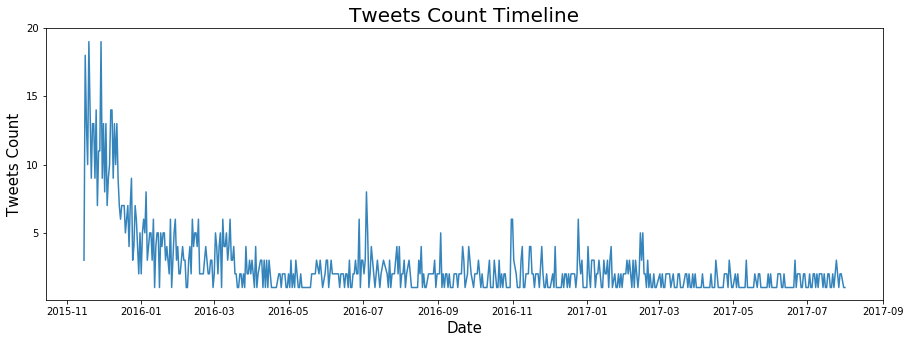

In [76]:
#tweets count timeline
df['timestamp'].dt.date.value_counts().plot(kind='line', alpha=0.9, figsize=(15,5))
plt.yticks([5,10,15,20])
plt.title('tweets count timeline'.title(),fontsize=20)
plt.xlabel('date'.title(), fontsize=15)
plt.ylabel('tweets count'.title(), fontsize=15);

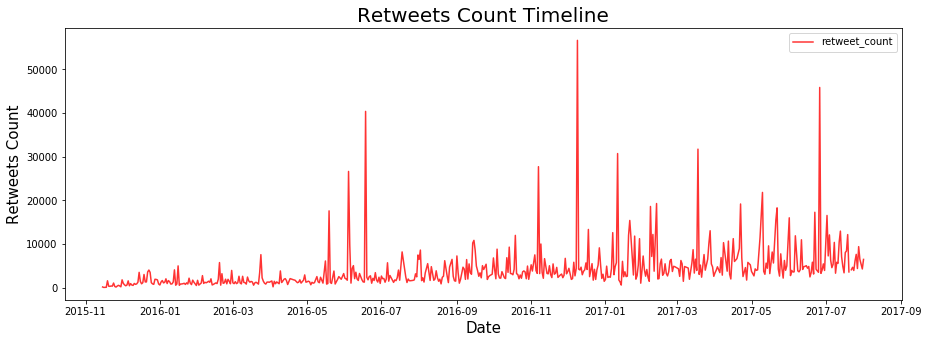

In [77]:
#retweets count timeline
df.groupby(df['timestamp'].dt.date).mean()[['retweet_count']].plot(kind='line',color='red', alpha=0.8, figsize=(15,5))
plt.title('retweets count timeline'.title(),fontsize=20)
plt.xlabel('date'.title(), fontsize=15)
plt.ylabel('retweets count'.title(), fontsize=15);

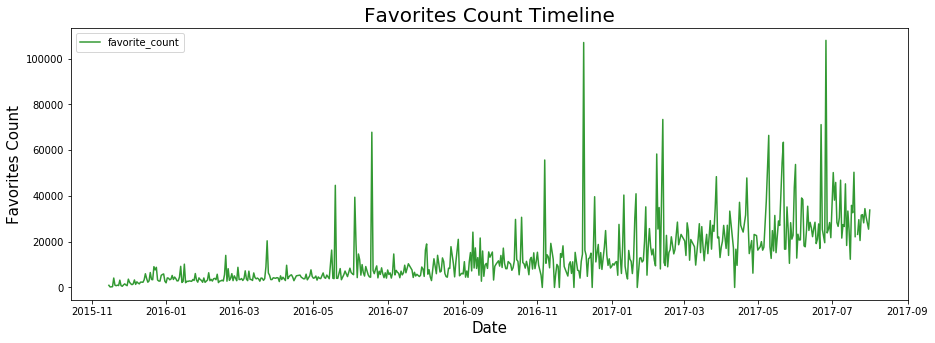

In [78]:
#favorites count timeline
df.groupby(df['timestamp'].dt.date).mean()[['favorite_count']].plot(kind='line',color='green', alpha=0.8, figsize=(15,5))
plt.title('favorites count timeline'.title(),fontsize=20)
plt.xlabel('date'.title(), fontsize=15)
plt.ylabel('favorites count'.title(), fontsize=15);


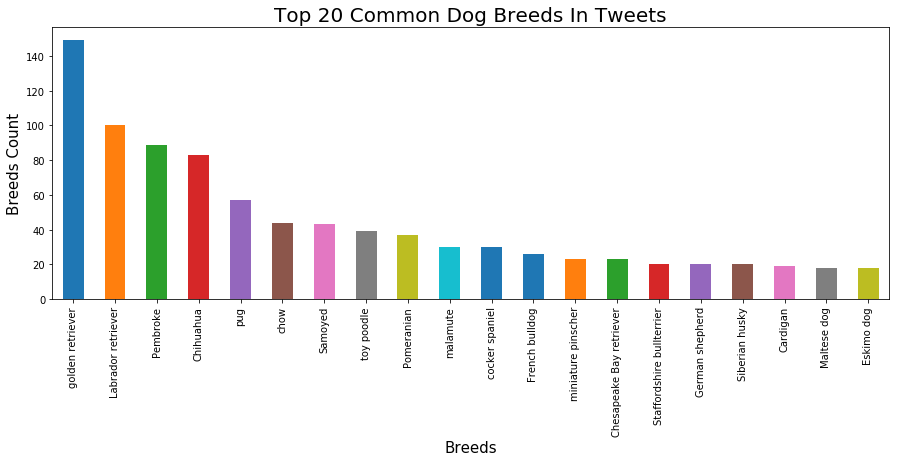

In [79]:
#top 20 common dog breeds in tweets
df['breed'].value_counts().head(20).plot(kind='bar', figsize=(15,5))
plt.title('top 20 common dog breeds in tweets'.title(), fontsize=20)
plt.xlabel('breeds'.title(), fontsize=15)
plt.ylabel('breeds count'.title(), fontsize=15);


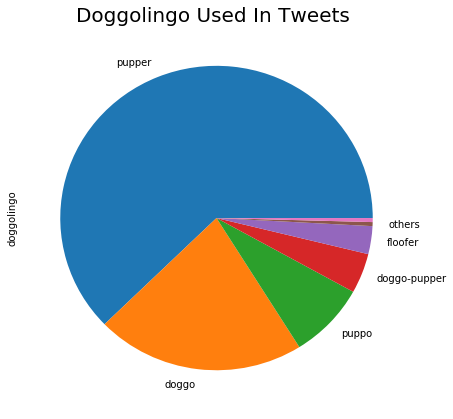

In [80]:
#doggolingo used in tweets
df['doggolingo'].value_counts().plot(kind='pie', labels=['pupper','doggo','puppo','doggo-pupper', 'floofer', 'others', ''], figsize=(7,7))
plt.title('doggolingo used in tweets '.title(), fontsize=20);